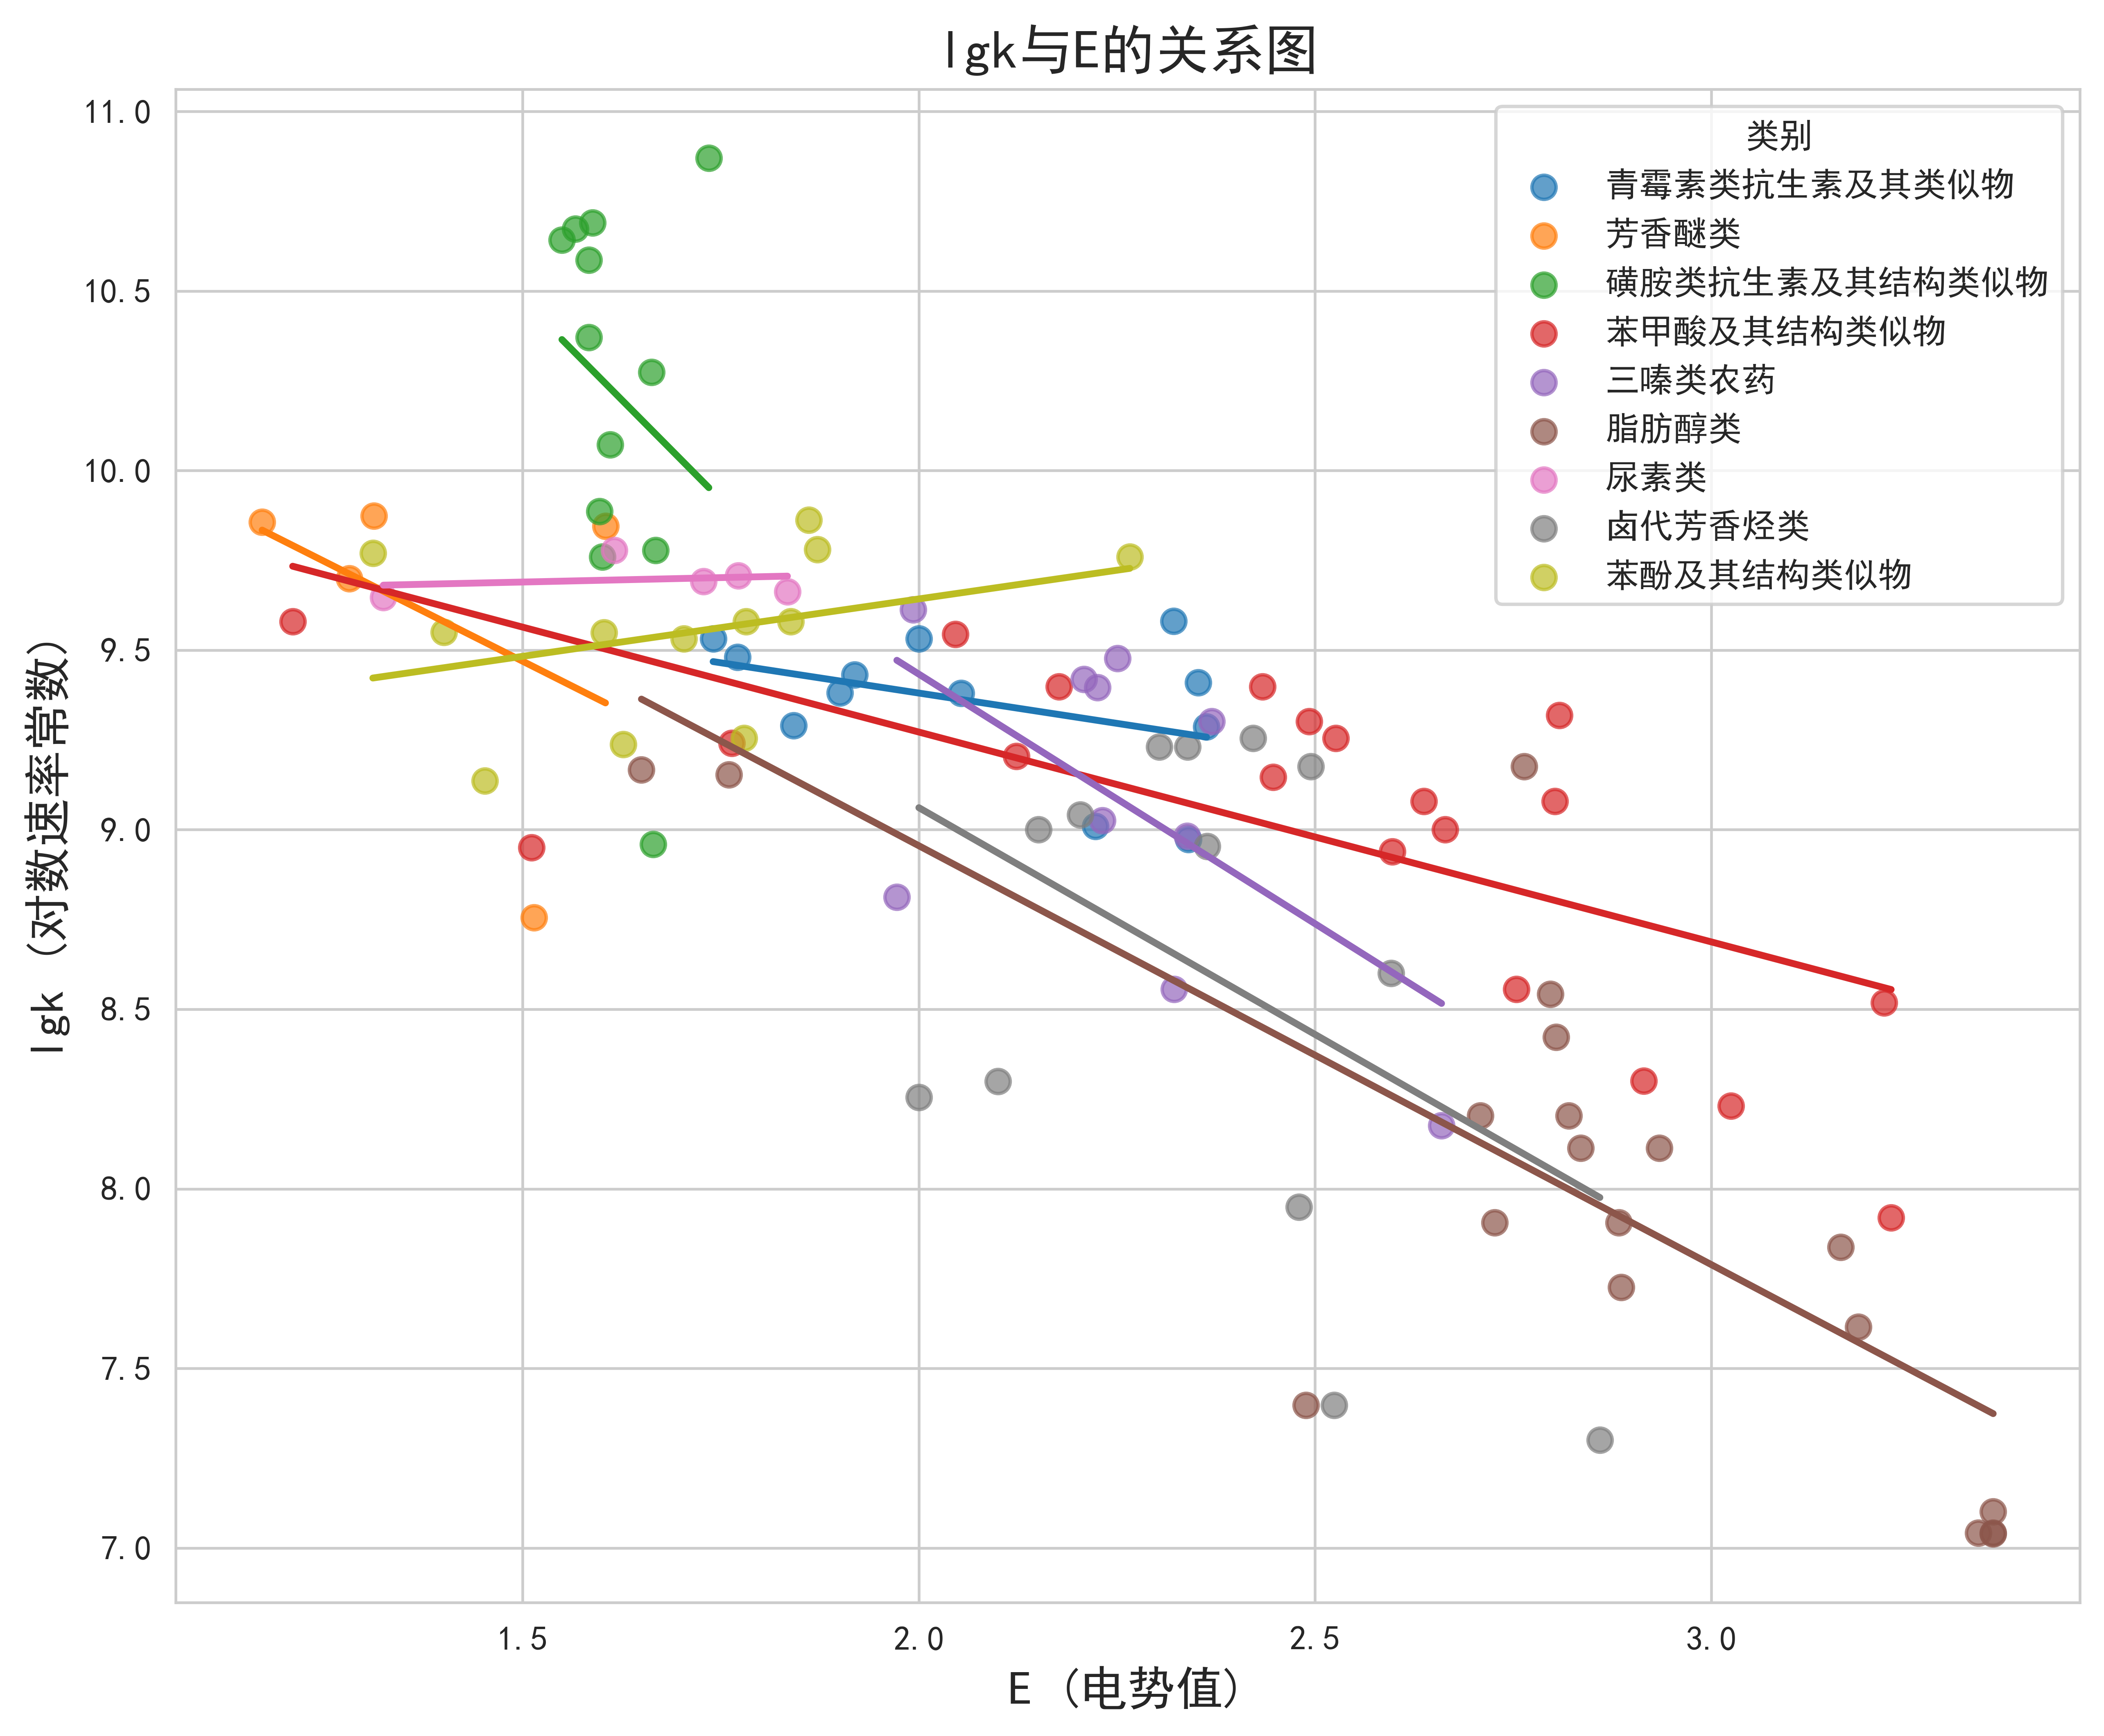

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set the style of seaborn
sns.set_style('whitegrid')

# Load the data from the Excel file
data_sheet2 = pd.read_excel('C:/Users/k/Desktop/硕士论文/SO4/SO4_240301/k_ORP/k_ORP.xlsx', sheet_name='Sheet2')

# Create a scatter plot with linear fit for each category of compounds
plt.figure(figsize=(10, 8))

# Unique categories in '类别'
categories = data_sheet2['类别'].unique()

# Colors for different categories
colors = sns.color_palette('tab10', len(categories))

# Plot each category
for category, color in zip(categories, colors):
    # Subset to the category
    subset = data_sheet2[data_sheet2['类别'] == category]
    
    # Draw the scatterplot
    sns.regplot(
        data=subset,
        x='E', 
        y='lgk', 
        ci=None, 
        label=category,
        color=color,
        scatter_kws={'s': 50, 'alpha': 0.7}, # alpha for transparency
        line_kws={'linewidth': 2}
    )

# Legend
plt.legend(title='类别')

# Title and labels
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title('lgk与E的关系图', fontsize=16)
plt.xlabel('E (电势值)', fontsize=14)
plt.ylabel('lgk (对数速率常数)', fontsize=14)

# Show the plot
plt.show()


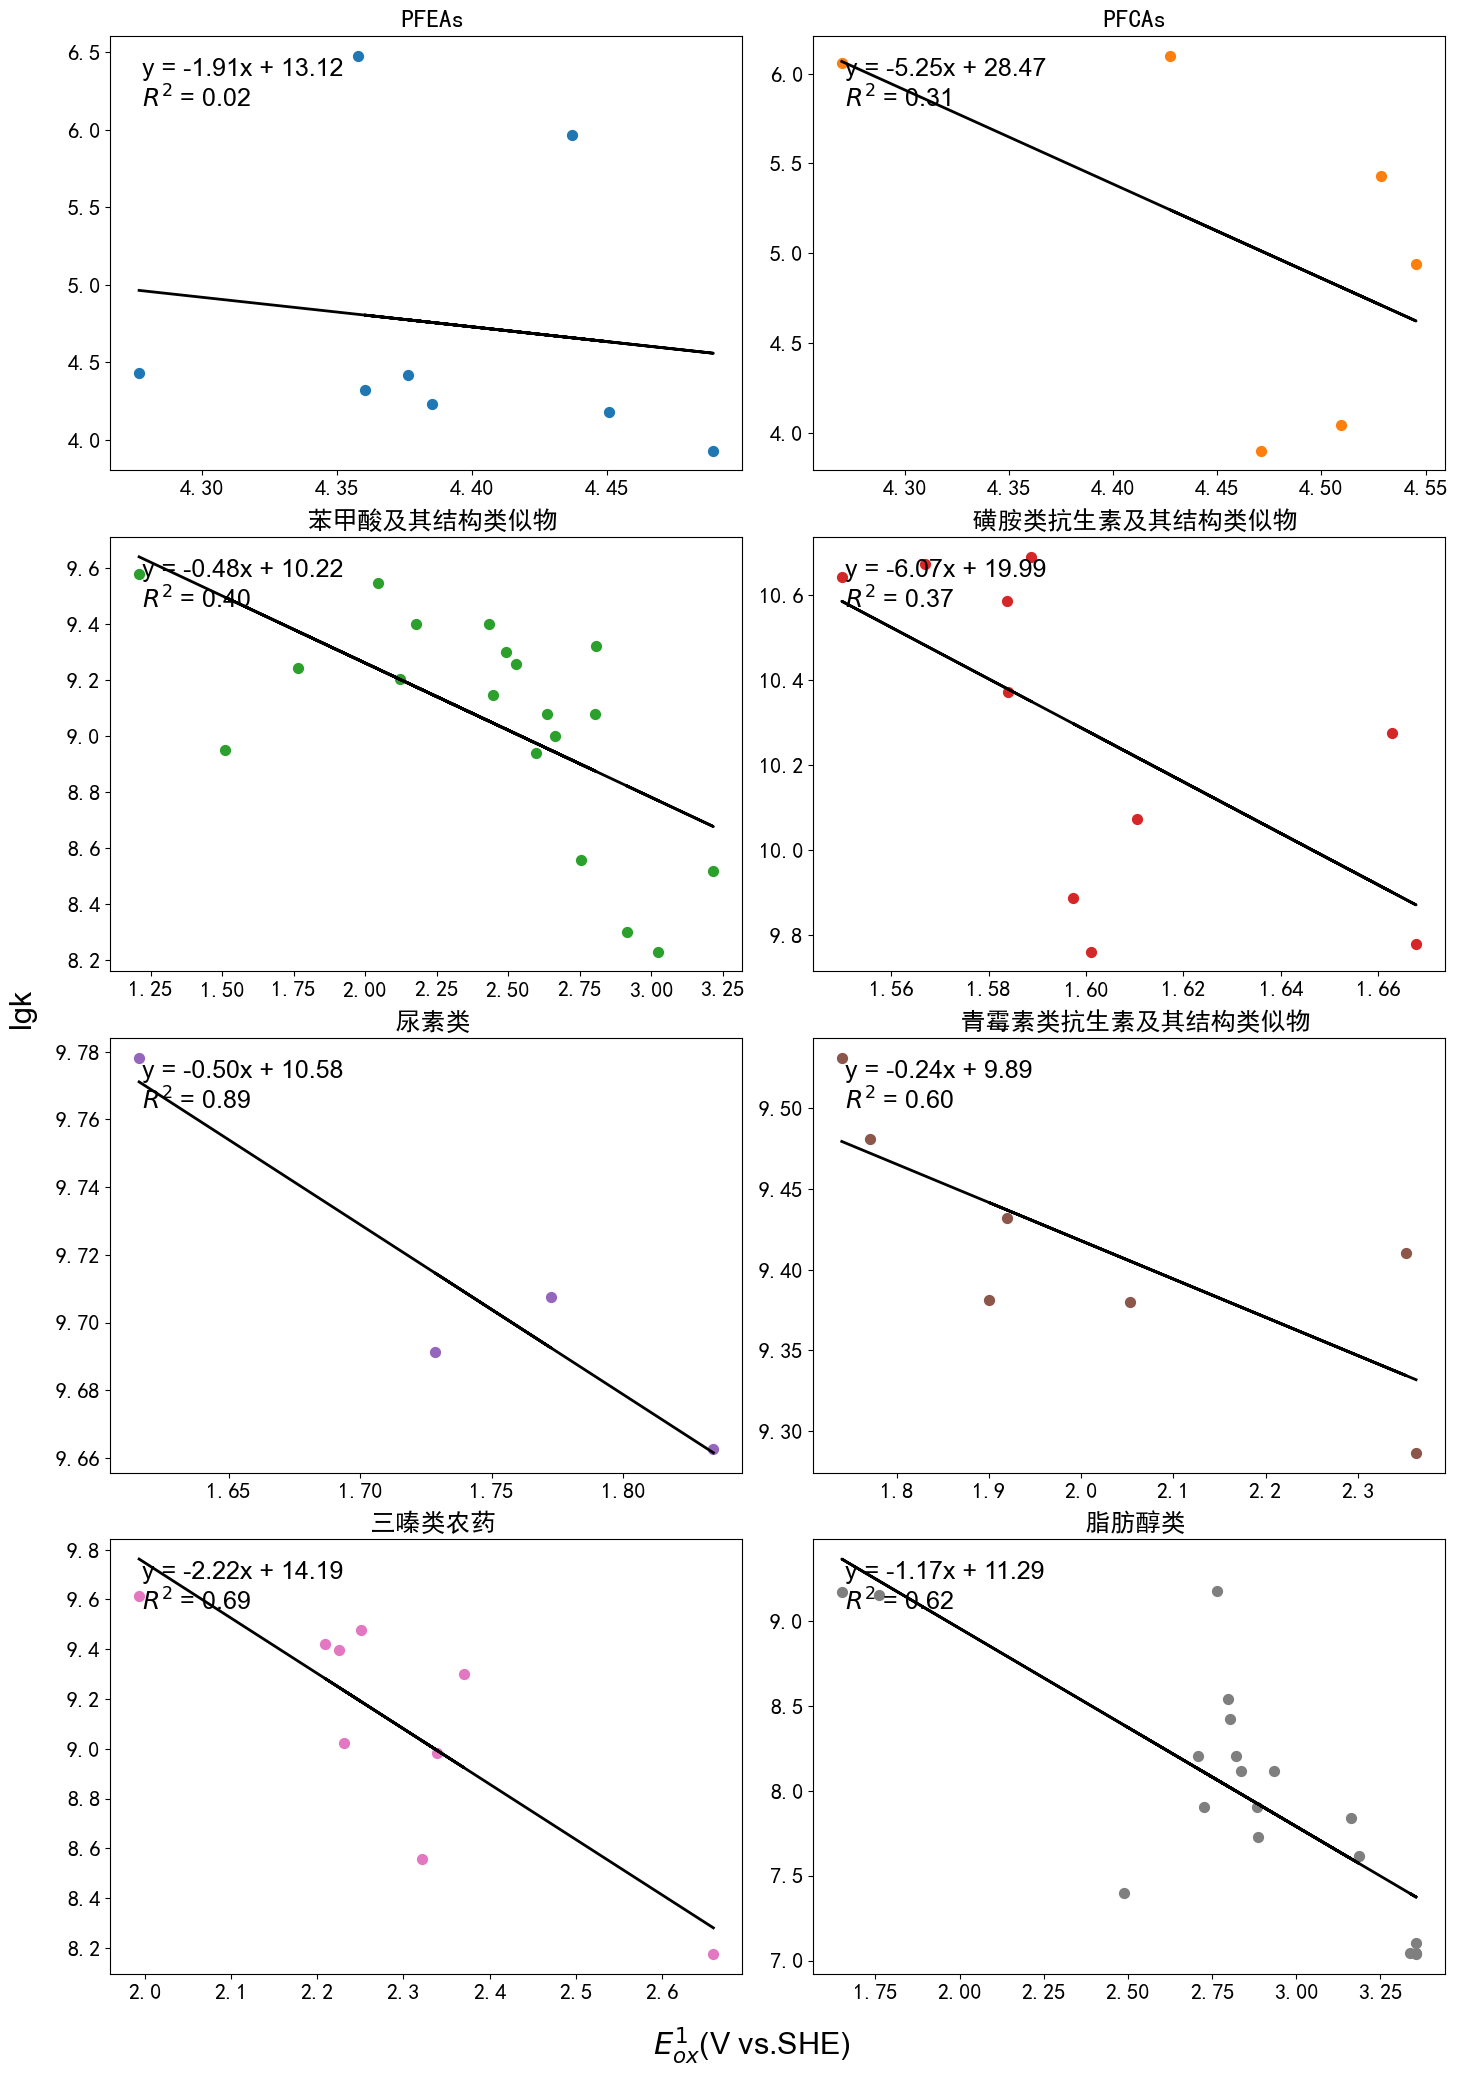

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import linregress

# Load the data from the Excel file
data_sheet2 = pd.read_excel('C:/Users/k/Desktop/硕士论文/SO4/SO4_240301/k_ORP/k_ORP.xlsx', sheet_name='Sheet4')

# Unique categories in '类别'
categories = data_sheet2['类别'].unique()

# Create a grid of subplots for each category
num_categories = len(categories)
cols = 2  # We will have two columns of subplots
rows = num_categories // cols + (num_categories % cols > 0)  # Calculate the necessary number of rows

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each category in a separate subplot with its linear regression equation and R²
for ax, category, color in zip(axes, categories, sns.color_palette('tab10', len(categories))):
    # Subset to the category
    subset = data_sheet2[data_sheet2['类别'] == category]
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(subset['E'], subset['lgk'])
    line = slope * subset['E'] + intercept
    
    # Draw the scatterplot
    ax.scatter(subset['E'], subset['lgk'], color=color, alpha=1, s=50)
    # 设置横纵坐标的字体和大小
    #ax.tick_params(axis='x', labelsize=16 )
   # ax.tick_params(axis='y', labelsize=16)
    # 设置刻度线朝外
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    #ax.tick_params("y",which="major",length=15,width = 2.0,colors = "black")
    #ax.tick_params("x",which="major",length=15,width = 2.0,colors = "black")

    # 移除方格线
    ax.grid(False)

    # Draw the regression line
    ax.plot(subset['E'], line, color="black", linewidth=2)

    
    # Annotate the regression line equation and R²
    ax.text(0.05, 0.95, f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}',
            ha='left', va='top', transform=ax.transAxes, fontsize=18,fontproperties = 'Arial', bbox=None)
    
    # Set title for each subplot
    ax.set_title(f' {category}', fontsize=18)
    
    # Set subplot borders to black
    for spine in ax.spines.values():
        spine.set_edgecolor('black')

# Set common labels
plt.rcParams['font.sans-serif'] = ['SimHei']
fig.text(0.5, -0.02, r'$E_{ox}^{1}$(V vs.SHE)', ha='center', va='center', fontsize=22,fontproperties = 'Arial')
fig.text(-0.02, 0.5, 'lgk ', ha='center', va='center', rotation='vertical', fontsize=22,fontproperties = 'Arial')

# Hide unused subplots if the number of categories is odd
if num_categories % cols != 0:
    for i in range(num_categories, rows * cols):
        fig.delaxes(axes[i])

# Show the plot

plt.show()
